In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# exemplo de arquivo de entrada:
# gosa, time
# 0.005187,	7.953897
# 0.005187,	7.887137
# 0.005187,	7.926853
# ...

max_threads = 6
types = ['random', 'reverse']
entries = ['quick.out_parallel', 'merge.out_parallel']
# o nome da pasta deve estar nesta lista,
# e deve-se selecionar a pasta abaixo:
selected_entry = entries[1]

def process_file(i):
    df_frames = []
    for type in types:
        df_segment = pd.read_csv(f'{selected_entry}_{type}/{i}_threads.txt', encoding='utf-8')
        # df_segment.drop(columns=['gosa'], inplace=True)
        df_segment.columns = [f'{i}_threads']
        df_mean = pd.DataFrame({
            f'{i}_mean': [df_segment[f'{i}_threads'].mean()],
            f'{i}_error': [df_segment[f'{i}_threads'].std()]
            }, index=[type])
        df_frames.append(df_mean)
    return pd.concat(df_frames)


frames = [process_file(i) for i in range(1, max_threads+1)]

df = pd.concat(frames, axis=1)
df

,1_mean,1_error,2_mean,2_error,3_mean,3_error,4_mean,4_error,5_mean,5_error,6_mean,6_error
random,1.678373,0.037654,1.064149,0.075622,0.770778,0.03595,0.686515,0.060208,0.623655,0.019512,0.619908,0.013434
reverse,1.108727,0.042714,0.724886,0.024299,0.626215,0.04282,0.595755,0.059316,0.621998,0.056061,0.598430,0.009566


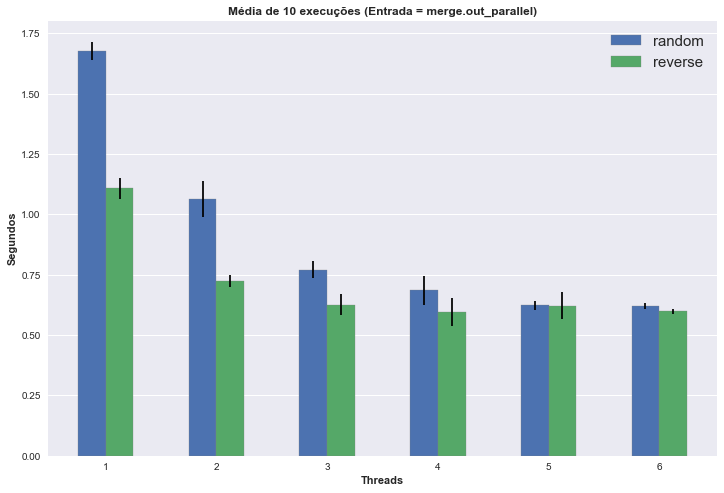

In [18]:
mpl.style.use('seaborn')

labels = df.columns
barWidth = 0.25
fig = plt.subplots(figsize=(12,8))

for i in range (len(types)):
    mean = [ df[f'{j}_mean'].iloc[i] for j in range(1, max_threads+1) ]
    error = [ df[f'{j}_error'].iloc[i] for j in range(1, max_threads+1) ]
    bar = [x + barWidth*(i) -barWidth/2 for x in np.arange(max_threads)]
    plt.bar(bar, mean, width=barWidth, edgecolor='grey', label=types[i])
    plt.errorbar(bar, mean, error, color='black', linestyle='None', marker='None', capsize=3)

plt.title(f'Média de 10 execuções (Entrada = {selected_entry})', fontweight='bold')
plt.xlabel('Threads', fontweight='bold')
plt.ylabel('Segundos', fontweight='bold')
plt.xticks([x for x in range(max_threads)], np.arange(max_threads)+1)
# plt.ylim(0, 1)
plt.grid(b=False, axis='x')
plt.legend(loc='best', fontsize=15)

# CASO QUEIRA SALVAR O GRÁFICO, DESCOMENTAR ABAIXO
plt.savefig('time_' + selected_entry + '.png', dpi=300)
plt.show()

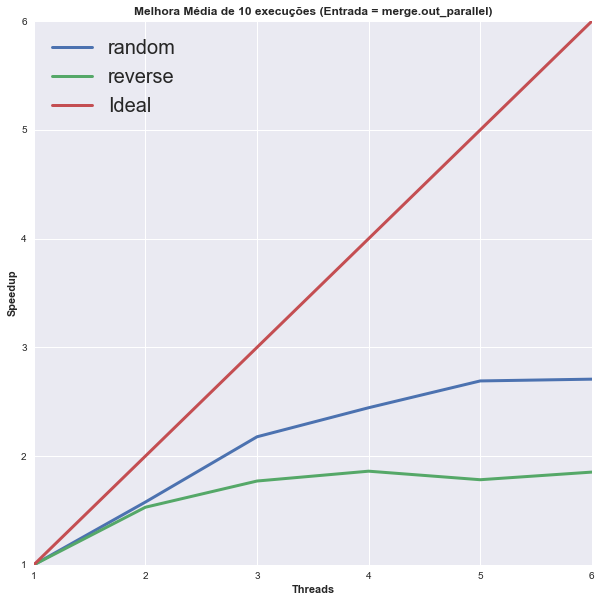

In [20]:
speedup = df.copy()
speedup.drop(columns=[f'{i}_error' for i in range(1, max_threads+1)], inplace=True)

for i in range(2, max_threads+1):
    speedup[f'{i}_mean'] = speedup.apply(
        lambda row: row['1_mean'] / row[f'{i}_mean'],
        axis=1
    )

speedup['1_mean'] = speedup.apply(lambda _: 1, axis=1)


mpl.style.use('seaborn')

fig = plt.subplots(figsize=(10,10))
x_axis = range(1,max_threads+1)
lineWidth = 3

for i in range(len(types)):
    yPoints = np.array(speedup.iloc[i])
    plt.plot(x_axis, yPoints, linewidth=lineWidth, label=types[i])

ideal = [i for i in range(1, max_threads+1)]
plt.plot(x_axis, ideal, linewidth=lineWidth, label='Ideal')

plt.legend(loc='best', fontsize=20)
plt.title(f'Melhora Média de 10 execuções (Entrada = {selected_entry})', fontweight='bold')
plt.xlabel('Threads', fontweight='bold')
plt.ylabel('Speedup', fontweight='bold')
plt.ylim(1,max_threads)
plt.xlim(1,max_threads)

# CASO QUEIRA SALVAR O GRÁFICO, DESCOMENTAR ABAIXO
plt.savefig('speedup_' + selected_entry + '.png', dpi=300)
plt.show()